In [1]:
import numpy as np
import control as ctrl # pip install control
import matplotlib.pyplot as plt


In [2]:
# Form 1 to define a transfer function
R = 1000 # 1kΩ
C = 1000e-6 # 1000μF

num = [1/(R*C)]
den = [1, 1/(R*C)]

sys1 = ctrl.tf(num, den)
sys1

TransferFunction(array([1.]), array([1., 1.]))

In [3]:
# Form 2 to define a transfer function
s = ctrl.tf('s')
beta = 1/(R*C)
sys2 = beta/(s + beta)
sys2

TransferFunction(array([1.]), array([1., 1.]))

Polos:  [-1.+0.j]
Zeros:  []


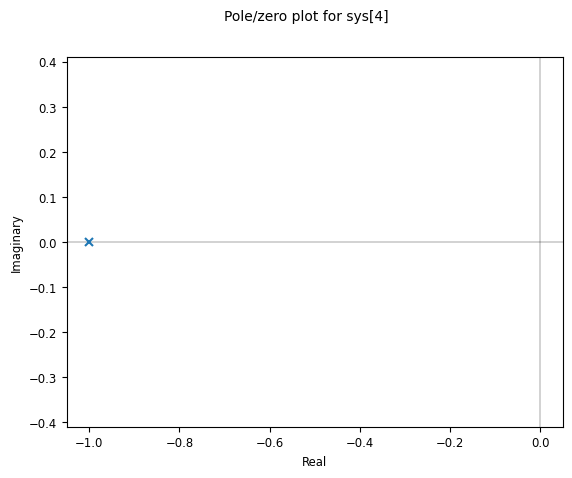

In [29]:
# To obtain poles and zeros from a system in transfer function form
print("Polos: ", ctrl.poles(sys2))
print("Zeros: ", ctrl.zeros(sys2))

# To obtain a poles-zeros map from a system in transfer function form
plt.figure()
ctrl.pzmap(sys2)
plt.show()

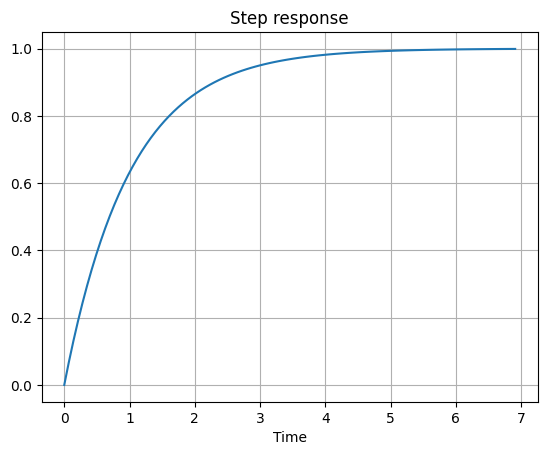

In [9]:
# Compute the step response for a linear system.
T, yout = ctrl.step_response(sys2)

plt.figure
plt.plot(T, yout)
plt.title('Step response')
plt.xlabel('Time')
plt.grid('minor')

In [14]:
# Ordinary Differential Equation for RC circuit
from IPython.display import display, Latex
display(Latex(r'$RC\dot{V}_{c} + V_{c} = V_{in}$'))

# Analytical solution
Vc = lambda Vin, t, R, C: Vin*(1 - np.exp(-t/(R*C)))

<IPython.core.display.Latex object>

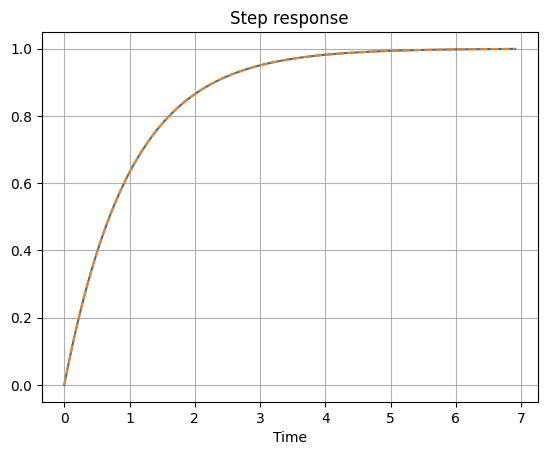

In [11]:
plt.figure
plt.plot(T, yout)
plt.plot(T, Vc(1, T, R, C), '--')
plt.title('Step response')
plt.xlabel('Time')
plt.grid('minor')

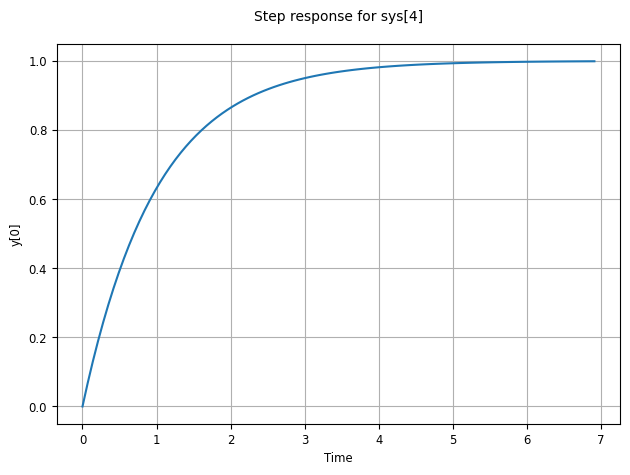

In [40]:
# Another form to compute the step response for the system
plt.figure
response = ctrl.step_response(sys2)
response.plot()
plt.xlabel('Time')
plt.grid('minor')
plt.show()

In [41]:
# Mass-Spring system
m = 0.5 # mass [Kg]
k = 0.03 # coefficient of the spring

s = ctrl.tf('s')

Gs = (1/m)/(s**2 + (k/m))
Gs

TransferFunction(array([2.]), array([1.  , 0.  , 0.06]))

Polos:  [-0.+0.24494897j  0.-0.24494897j]
Zeros:  []


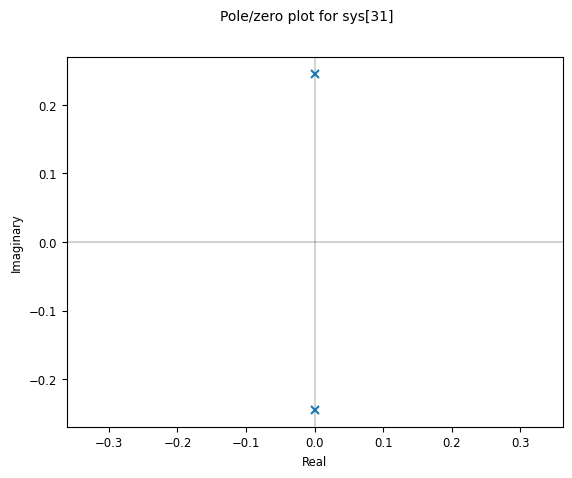

In [42]:
# To obtain poles and zeros from a system in transfer function form
print("Polos: ", ctrl.poles(Gs))
print("Zeros: ", ctrl.zeros(Gs))

# To obtain a poles-zeros map from a system in transfer function form
plt.figure()
ctrl.pzmap(Gs)
plt.show()

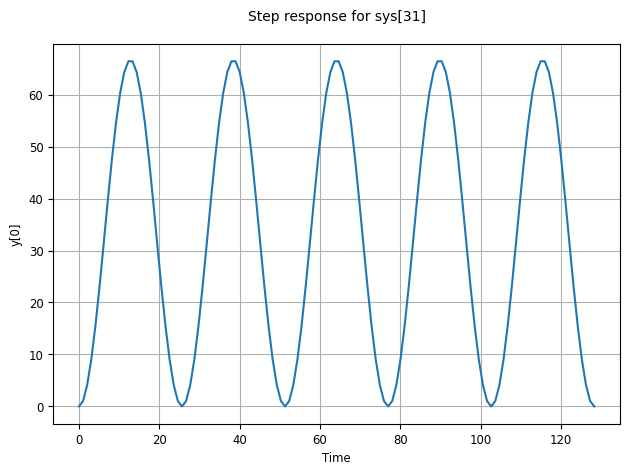

In [43]:
plt.figure
response = ctrl.step_response(Gs)
response.plot()
plt.xlabel('Time')
plt.grid('minor')
plt.show()

In [51]:
# Mass-Spring-Damp
k = 0.01
m = 5
b = 0.09

s = ctrl.tf('s')

Gs_2 = (1/m)/(s**2 + (b/m)*s + (k/m))
Gs_2

TransferFunction(array([0.2]), array([1.   , 0.018, 0.002]))

Polos:  [-0.009+0.04380639j -0.009-0.04380639j]
Zeros:  []


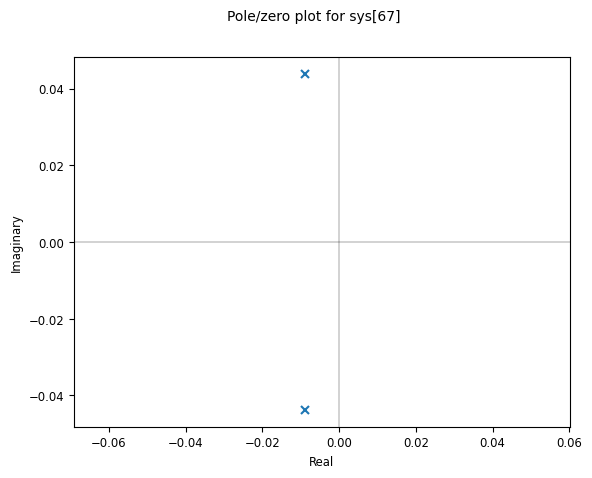

In [52]:
# To obtain poles and zeros from a system in transfer function form
print("Polos: ", ctrl.poles(Gs_2))
print("Zeros: ", ctrl.zeros(Gs_2))

# To obtain a poles-zeros map from a system in transfer function form
plt.figure()
ctrl.pzmap(Gs_2)
plt.show()

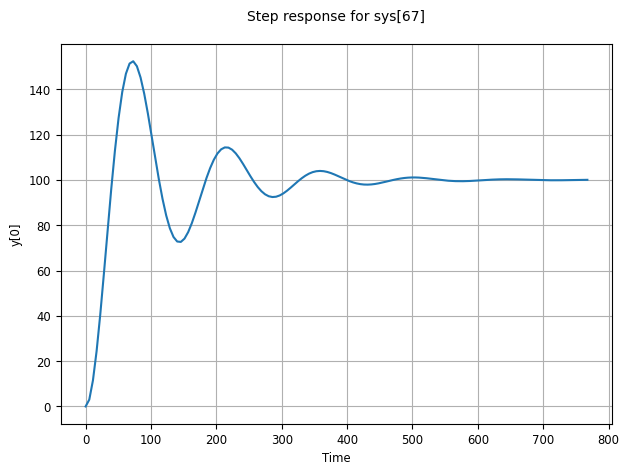

In [53]:
plt.figure
response = ctrl.step_response(Gs_2)
response.plot()
plt.xlabel('Time')
plt.grid('minor')
plt.show()

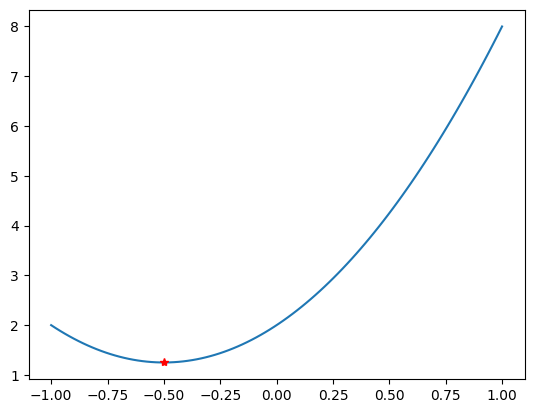

In [59]:
x = np.linspace(-1,1,100)

f = lambda x: 3*x**2 + 3*x + 2

plt.figure
plt.plot(x, f(x))
plt.plot(-0.5, f(-0.5), '*r')
plt.show()